In [1]:
import os
path = os.path.abspath(os.path.join('..','..'))
print(path)
import sys

sys.path.insert(0,path)
print(sys.executable)

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, CashFlowInput, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

/home/scuervo/Documents/dev/dcapy
/home/scuervo/anaconda3/envs/res/bin/python


In [13]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':[80,100],
        'b':0,
        'fluid_rate':250
    },
    'start':'2021-01-01',
    'end':'2022-01-01',
    'freq_input':'M',
    'freq_output':'M',
    'cashflow_params':{
        'params_list': [
            {
                'name':'fix_opex',
                'const_value':-5000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-5,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':60,
                'target':'income',
                'multiply':'oil_volume'
            }
        ]
    }
}

p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: [80.0, 100.0] bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2022, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=CashFlowInput(params_list=[CashFlowParams(name='fix_opex', const_value=-5000.0, array_values=None, target='opex', multiply=None, agg='sum', wi=1), CashFlowParams(name='var_opex', const_value=-5.0, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1), CashFlowParams(name='income', const_value=60.0, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1)]), cashflow=None, depends=None, forecast=None)

In [14]:
f1 = p1.generate_forecast()
f1.head()

/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period
date,,,,,,,,,,,,,
2021-01,80.000000,0.000000,0,0.000000,250.0,170.000000,0.680000,2.125000,0.000000,0.0,0.000000,0.0,pdp
2021-02,77.987393,2448.672116,0,2448.672116,250.0,172.012607,0.688050,2.205646,5332.390824,7750.0,5332.390824,7750.0,pdp
2021-03,76.213109,4607.383867,0,2158.711751,250.0,173.786891,0.695148,2.280276,10198.423768,14750.0,4866.032944,7000.0,pdp
2021-04,74.295771,6940.145308,0,2332.761441,250.0,175.704229,0.702817,2.364929,15645.254867,22500.0,5446.831100,7750.0,pdp
2021-05,72.486222,9141.763651,0,2201.618343,250.0,177.513778,0.710055,2.448931,20970.668217,30000.0,5325.413350,7500.0,pdp


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

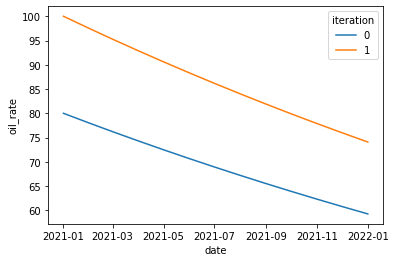

In [15]:
sns.lineplot(data=f1,x=f1.index.to_timestamp(),y='oil_rate', hue='iteration')

In [16]:
p1.generate_cashflow()

[CashFlowModel(name='pdp_0', income=[CashFlow(name='income', const_value=[0.0, 146920.32695275228, 129522.70507709867, 139965.68643055417, 132097.10058734557, 133121.24231748065, 125637.4371832177, 126611.4974897234, 123426.25731726359, 116487.48449533487, 117390.60570980342, 110791.14492930625, 111650.10272888721], start=datetime.date(2021, 1, 31), end=datetime.date(2022, 1, 31), periods=None, freq='M', chgpts=None)], opex=[CashFlow(name='fix_opex', const_value=-5000.0, start=datetime.date(2021, 1, 31), end=datetime.date(2022, 1, 31), periods=None, freq='M', chgpts=None), CashFlow(name='var_opex', const_value=[-0.0, -12243.360579396023, -10793.558756424889, -11663.80720254618, -11008.091715612132, -11093.436859790054, -10469.786431934808, -10550.958124143617, -10285.5214431053, -9707.290374611239, -9782.550475816952, -9232.59541077552, -9304.175227407268], start=datetime.date(2021, 1, 31), end=datetime.date(2022, 1, 31), periods=None, freq='M', chgpts=None)], capex=None),
 CashFlowMod